### 1. Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from datetime import timedelta

### 2. Loading the data and data cleaning

In [2]:
data = pd.read_csv('dataset/weather-sa-2017-2019-clean.csv')
data.shape

(249023, 15)

In [3]:
data.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


It show that we have 10 Numerical with int and float variable and 5 Categorical variable with object datatype

We notice that `humidity` is object so we will convert to numerical and remove the %

In [5]:
data = data.replace(" ", np.nan).replace("N/A", np.nan ).replace("NA", np.nan).replace("", np.nan)
#data['humidity'] = data['humidity'].str_replace('%','')
data['humidity'] = data['humidity'].str.replace('%',' ').astype('float')

data.isnull().sum()

Unnamed: 0     0
city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  float64
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 28.5+ MB


In [7]:
data.describe()

,Unnamed: 0,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249006.000000,248951.000000,249023.000000
mean,121690.686174,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,37.553139,1015.455355,11.053453
std,71831.546649,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,23.593068,6.970779,7.053005
min,0.000000,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,0.000000,904.000000,-1.000000
25%,59402.500000,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,17.000000,1011.000000,5.000000
50%,121658.000000,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,32.000000,1016.000000,16.000000
75%,183913.500000,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,55.000000,1021.000000,16.000000
max,246169.000000,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,100.000000,1101.000000,161.000000


In [8]:
### 2. Data cleansing

In [9]:
# Combain date and time columns to datetime column
#data['date'] = data['date'] + ' ' + data['time']

In [10]:
### 3.1 Convert the data types

In [11]:
#data['date'] = pd.to_datetime(data["date"])
#data['humidity'] = pd.to_numeric(data["humidity"].str.replace('%',' '), downcast="float") / 100


## 2.2  Drop Unnecessary columns

- Unnamed column in the index of the data and we do not need it because datafram hundle that.
- I also remove the follwing columns because not need any since it represt the date & time.

In [12]:
delete_col =['Unnamed: 0','time', 'date' ]
data.drop(delete_col, axis =1 , inplace =True)

### 2.3 Dealing with missing values

In [13]:
data.isnull().sum()

city           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

- We have 17 missing value on humidity and 72 missing value in barometer
- I decide to get means of the humidity and barimeter per city.

In [14]:
# Here to display the means per city.
data.groupby(by='city')[['humidity','barometer']].mean().reset_index()

,city,humidity,barometer
0,Assir,47.590154,1023.498147
1,Baha,38.722982,1019.012376
2,EP,45.092703,1008.609077
3,Hail,41.536087,1013.528736
4,Jawf,30.500442,1015.505283
5,Jazan,45.803066,1023.087145
6,Madina,19.971600,1014.141254
7,Mecca,54.158772,1008.713919
8,Najran,45.953645,1023.093818
9,Northern boarder,26.263764,1012.641971


In [15]:
# lets check sample of the data 

In [16]:
data[data['humidity'].isnull() == True]

,city,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
3385,Qassim,2017,5,26,10,0,Sunny,37,7,NaN,NaN,3
5270,Qassim,2017,8,13,4,0,Clear,34,4,NaN,NaN,16
6723,Qassim,2017,10,13,16,0,Sunny,38,9,NaN,NaN,16
23178,Hail,2017,5,26,10,0,Sunny,37,7,NaN,NaN,3
25063,Hail,2017,8,13,4,0,Clear,34,4,NaN,NaN,16
26516,Hail,2017,10,13,16,0,Sunny,38,9,NaN,NaN,16
70412,EP,2018,5,10,14,0,Clear,37,26,NaN,1005.0,-1
72357,EP,2018,8,4,19,0,Clear,36,13,NaN,999.0,16
72892,EP,2018,8,28,4,0,Clear,30,7,NaN,997.0,16
74947,EP,2018,11,26,7,0,Sunny,16,19,NaN,1017.0,16


In [17]:
data[data['barometer'].isnull() == True]

,city,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
3385,Qassim,2017,5,26,10,0,Sunny,37,7,NaN,NaN,3
5270,Qassim,2017,8,13,4,0,Clear,34,4,NaN,NaN,16
5751,Qassim,2017,9,2,14,0,Thunderstorms Passing clouds,43,2,10.0,NaN,-1
6723,Qassim,2017,10,13,16,0,Sunny,38,9,NaN,NaN,16
7010,Qassim,2017,10,25,19,0,Clear,32,15,21.0,NaN,16
...,...,...,...,...,...,...,...,...,...,...,...,...
229429,Jawf,2017,2,1,23,36,Clear,5,6,NaN,NaN,5
229454,Jawf,2017,2,2,23,36,Clear,5,6,NaN,NaN,5
229913,Jawf,2017,2,22,6,23,Rain Passing clouds,7,11,NaN,NaN,6
237265,Jawf,2017,12,24,13,23,Low level haze,28,37,NaN,NaN,5


In [18]:
# now filling the missing values with means for each city
data['humidity'] = data['humidity'].fillna(data.groupby('city')['humidity'].transform('mean'))
data['barometer'] = data['barometer'].fillna(data.groupby('city')['barometer'].transform('mean'))

In [19]:
data.isnull().sum()

city          0
year          0
month         0
day           0
hour          0
minute        0
weather       0
temp          0
wind          0
humidity      0
barometer     0
visibility    0
dtype: int64

## Weather data and create the target
#### data and imbalnce might need to downsample. we should not use teh 
### we should not use accurcy `.score` beacuse imbalnce data
### use recall or/and precision. combination called F1 scorse which is better.



In [20]:
### 2.3 deal with target column

- it seems that the weather column in the dataset represents the weather phenomena, which is in a text format. and multiple phenomena merged together. So we will extract the keywords "rain" and it's synonyms and placed in a new column shows the result whether is rained or not raind on that day.

In [21]:
import re
data['rain'] = data['weather'].str.contains('rain|shower|sprinkle|thunderstorm', case = False ,regex=True)

- lets check a sample

In [22]:
data.groupby('weather')['rain'].unique().sample(20)

weather
Thundershowers  Partly sunny          [True]
Light rain  Passing clouds            [True]
Light rain  Mostly cloudy             [True]
Fog                                  [False]
Partly sunny                         [False]
Rain  Partly sunny                    [True]
Partly cloudy                        [False]
Heavy rain  More clouds than sun      [True]
Thunderstorms  Passing clouds         [True]
Warm                                 [False]
Thunderstorms  Broken clouds          [True]
Rain  Fog                             [True]
More clouds than sun                 [False]
Light rain  Scattered clouds          [True]
Scattered clouds                     [False]
Drizzle  Broken clouds               [False]
Drizzle  Fog                         [False]
Drizzle  Dense fog                   [False]
Rain  Partly cloudy                   [True]
Sandstorm                            [False]
Name: rain, dtype: object

In [23]:
# now we don't need weather column and I have droped it

In [24]:
data.drop('weather', axis =1 , inplace =True)

In [25]:
data

,city,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility,rain
0,Qassim,2017,1,1,24,0,17,11,64.0,1018.0,16,False
1,Qassim,2017,1,1,1,0,17,6,64.0,1018.0,16,False
2,Qassim,2017,1,1,3,0,15,11,72.0,1019.0,16,False
3,Qassim,2017,1,1,4,0,15,11,72.0,1019.0,16,False
4,Qassim,2017,1,1,5,0,15,9,72.0,1019.0,16,False
...,...,...,...,...,...,...,...,...,...,...,...,...
249018,Jawf,2019,4,30,19,0,32,19,14.0,1014.0,-1,False
249019,Jawf,2019,4,30,20,0,29,9,22.0,1015.0,-1,False
249020,Jawf,2019,4,30,21,0,27,7,24.0,1016.0,-1,False
249021,Jawf,2019,4,30,22,0,26,0,26.0,1017.0,16,False


### 3. EDA

- `city`, `rain` are categorical variables also date and time considered categercals. 
- `rain` is the target variable.

 discover the categorical varable `city`

In [26]:
print('city contains', len(data['city'].unique()), 'labels')

city contains 13 labels


In [27]:
data['city'].value_counts()

Jawf                20352
Mecca               20268
Tabuk               20240
Northern boarder    20235
Hail                20121
Madina              19965
Baha                19959
Najran              19847
Jazan               19829
Qassim              19793
EP                  18505
Riyadh              16421
Assir               13488
Name: city, dtype: int64

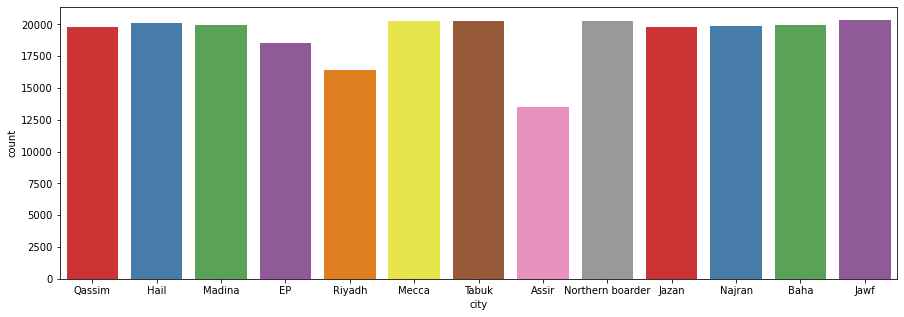

In [28]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="city", data=data, palette="Set1")
plt.show()

let do One Hot Encoding for the city variable.

In [29]:
pd.get_dummies(data['city'], drop_first=True).head()

,Baha,EP,Hail,Jawf,Jazan,Madina,Mecca,Najran,Northern boarder,Qassim,Riyadh,Tabuk
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0


 discover the categorical varable `rain`

In [30]:
print('rain contains', len(data['rain'].unique()), 'labels')

rain contains 2 labels


In [31]:
data['rain'].value_counts()

False    245654
True       3369
Name: rain, dtype: int64

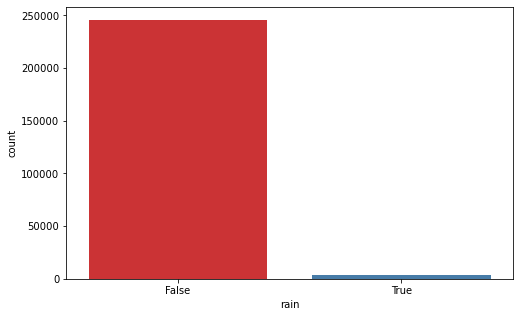

In [32]:
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(x="rain", data=data, palette="Set1")
plt.show()

In [33]:
data['rain'].value_counts()

False    245654
True       3369
Name: rain, dtype: int64

In [34]:
weather = data.loc[:10000,'temp':'visibility']
weather

,temp,wind,humidity,barometer,visibility
0,17,11,64.0,1018.0,16
1,17,6,64.0,1018.0,16
2,15,11,72.0,1019.0,16
3,15,11,72.0,1019.0,16
4,15,9,72.0,1019.0,16
...,...,...,...,...,...
9996,17,19,88.0,1020.0,16
9997,18,15,83.0,1020.0,16
9998,19,15,73.0,1020.0,16
9999,21,17,69.0,1019.0,16


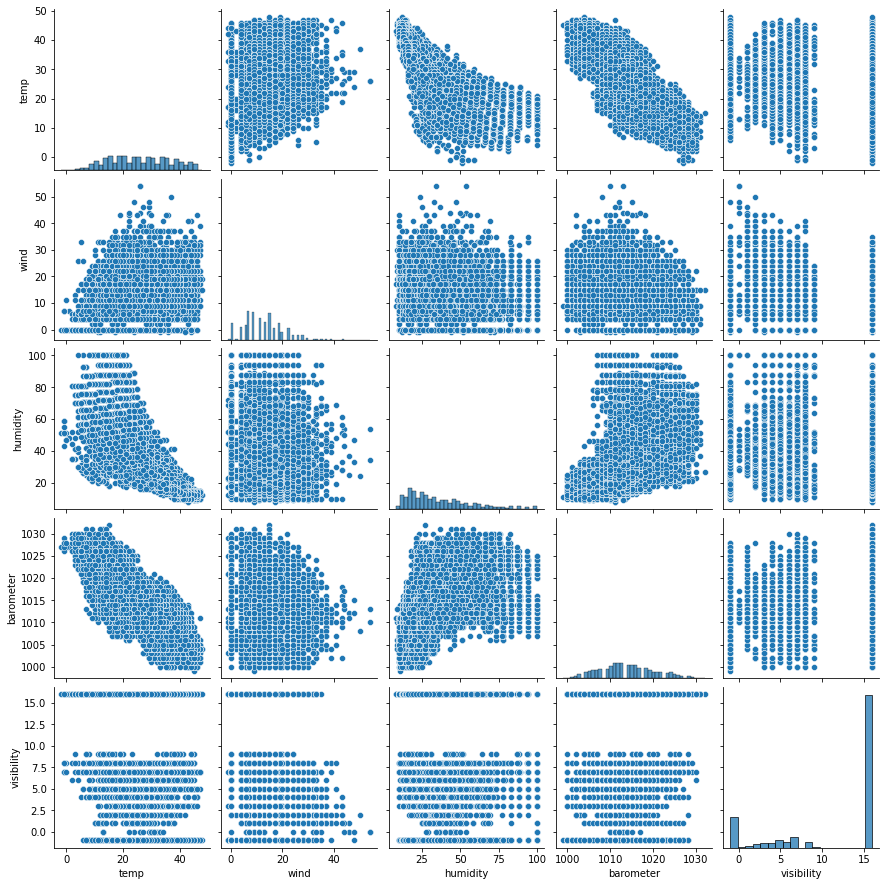

In [35]:
#rainsdata = ['rain'].value_counts()
sns.pairplot(weather);

In [36]:
print(round(data.loc[:,'temp':'visibility'].describe()))


           temp      wind  humidity  barometer  visibility
count  249023.0  249023.0  249023.0   249023.0    249023.0
mean       25.0      13.0      38.0     1015.0        11.0
std         9.0       9.0      24.0        7.0         7.0
min        -4.0      -1.0       0.0      904.0        -1.0
25%        18.0       7.0      17.0     1011.0         5.0
50%        24.0      11.0      32.0     1016.0        16.0
75%        31.0      19.0      55.0     1021.0        16.0
max        50.0     163.0     100.0     1101.0       161.0


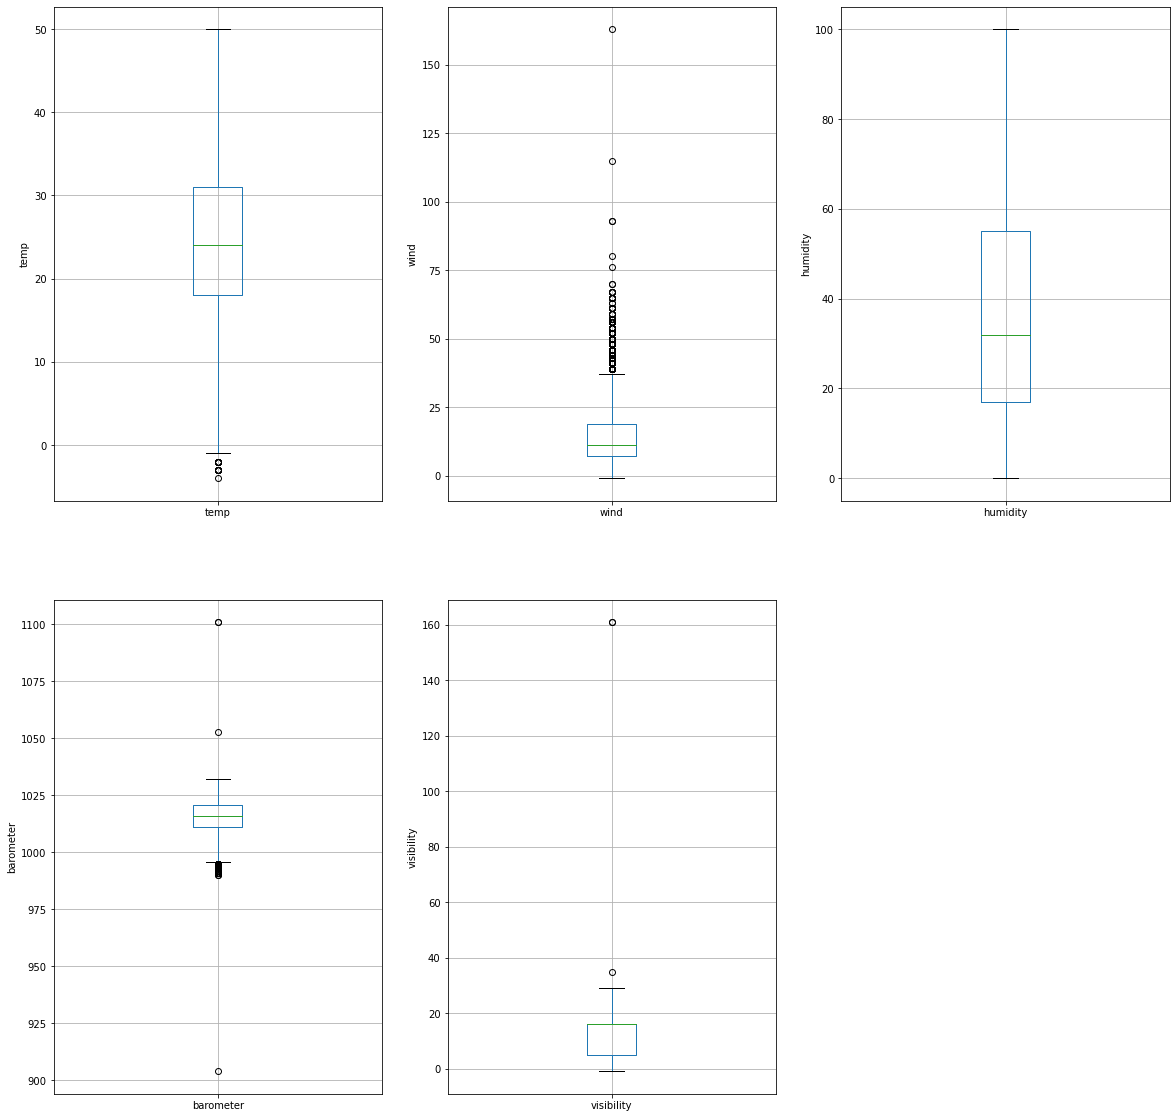

In [37]:
# draw boxplots to visualize outliers

plt.figure(figsize=(20,20))

plt.subplot(2, 3, 1)
fig = data.boxplot(column='temp')
fig.set_title('')
fig.set_ylabel('temp')

plt.subplot(2, 3, 2)
fig = data.boxplot(column='wind')
fig.set_title('')
fig.set_ylabel('wind')

plt.subplot(2, 3, 3)
fig = data.boxplot(column='humidity')
fig.set_title('')
fig.set_ylabel('humidity')


plt.subplot(2, 3, 4)
fig = data.boxplot(column='barometer')
fig.set_title('')
fig.set_ylabel('barometer')


plt.subplot(2, 3, 5)
fig = data.boxplot(column='visibility')
fig.set_title('')
fig.set_ylabel('visibility');

In [38]:
sample = data.loc[:,'wind':'rain'].sample(10000)

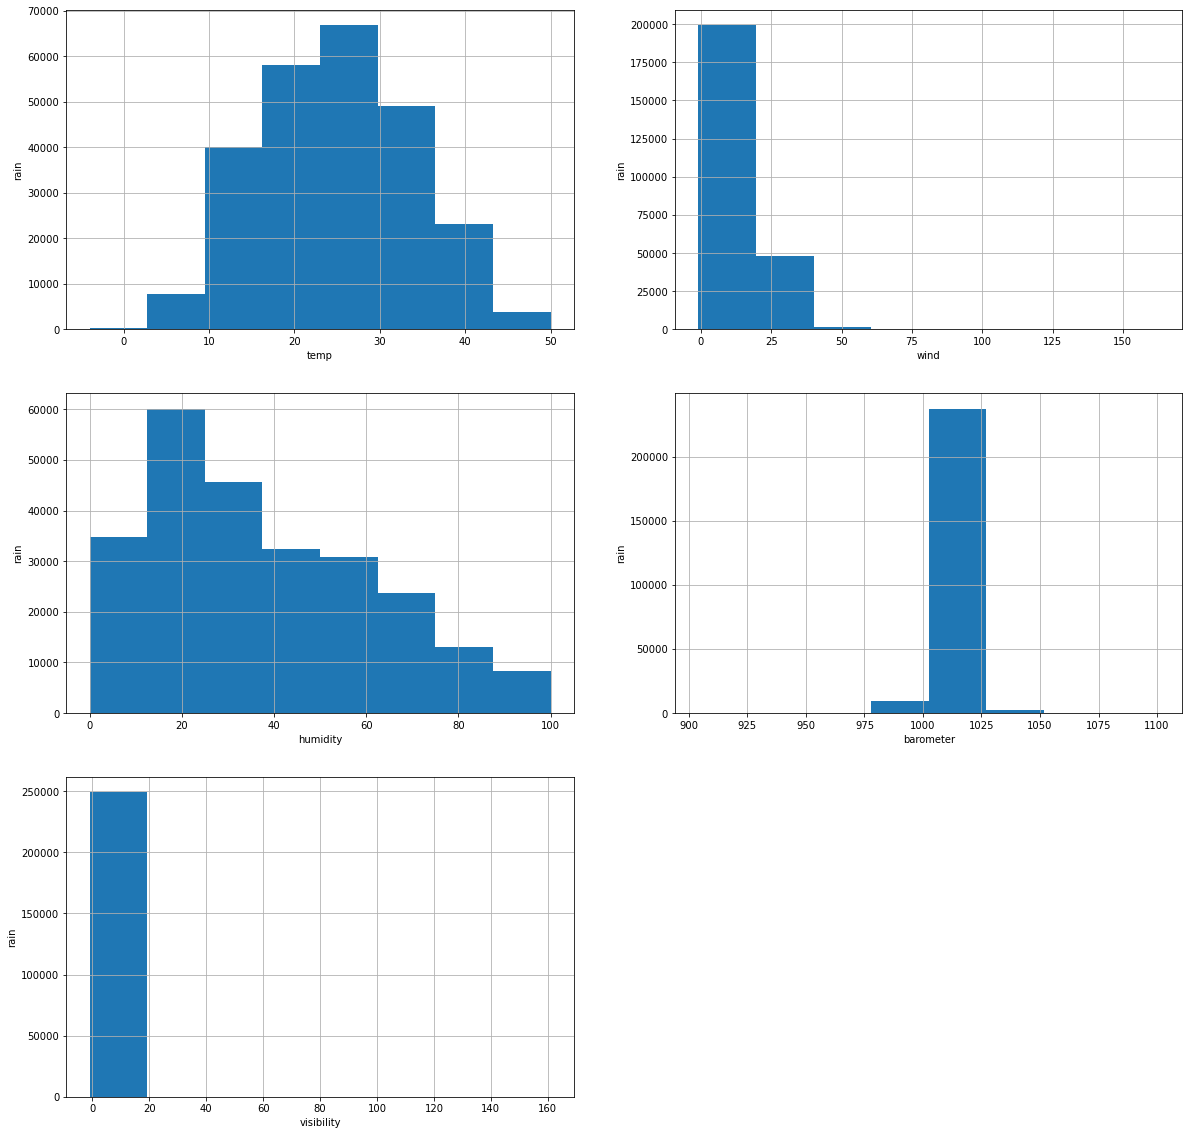

In [39]:

plt.figure(figsize=(20,20))

plt.subplot(3, 2, 1)
fig = data.temp.hist(bins=8);
fig.set_xlabel('temp')
fig.set_ylabel('rain')

plt.subplot(3, 2, 2)
fig = data.wind.hist(bins=8);
fig.set_xlabel('wind')
fig.set_ylabel('rain')

plt.subplot(3, 2, 3)
fig = data.humidity.hist(bins=8);
fig.set_xlabel('humidity')
fig.set_ylabel('rain')


plt.subplot(3, 2, 4)
fig = data.barometer.hist(bins=8);
fig.set_xlabel('barometer')
fig.set_ylabel('rain')

plt.subplot(3, 2, 5)
fig = data.visibility.hist(bins=8);
fig.set_xlabel('visibility')
fig.set_ylabel('rain');

In [44]:
data.describe()

,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000
mean,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,37.553192,1015.454041,11.053453
std,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,23.592329,6.970366,7.053005
min,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,0.000000,904.000000,-1.000000
25%,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,17.000000,1011.000000,5.000000
50%,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,32.000000,1016.000000,16.000000
75%,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,55.000000,1021.000000,16.000000
max,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,100.000000,1101.000000,161.000000


We can see that temp is nearly good distrubutied but all other four variables are skewed. So, I will use interquantile range to find outliers.

In [45]:
# find outliers for wind variable

IQR = data['wind'].quantile(0.75) - data['wind'].quantile(0.25)
Lower_fence = data['wind'].quantile(0.25) - (IQR * 3)
Upper_fence = data['wind'].quantile(0.75) + (IQR * 3)
print('Wind outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Wind outliers are values < -29.0 or > 55.0


In [46]:
# find outliers for visibility variable

IQR = data['visibility'].quantile(0.75) - data['visibility'].quantile(0.25)
Lower_fence = data['visibility'].quantile(0.25) - (IQR * 3)
Upper_fence = data['visibility'].quantile(0.75) + (IQR * 3)
print('Visibility outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))



Visibility outliers are values < -28.0 or > 49.0


In [47]:
# find outliers for humidity variable

IQR = data['humidity'].quantile(0.75) - data['humidity'].quantile(0.25)
Lower_fence = data['humidity'].quantile(0.25) - (IQR * 3)
Upper_fence = data['humidity'].quantile(0.75) + (IQR * 3)
print('humidity outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))



humidity outliers are values < -97.0 or > 169.0


In [48]:
#sns.pairplot(sample, hue="rain",plot_kws={'alpha': 0.7,'s':50},diag_kind='kde');

In [49]:
correlation = data.corr()


<AxesSubplot:>

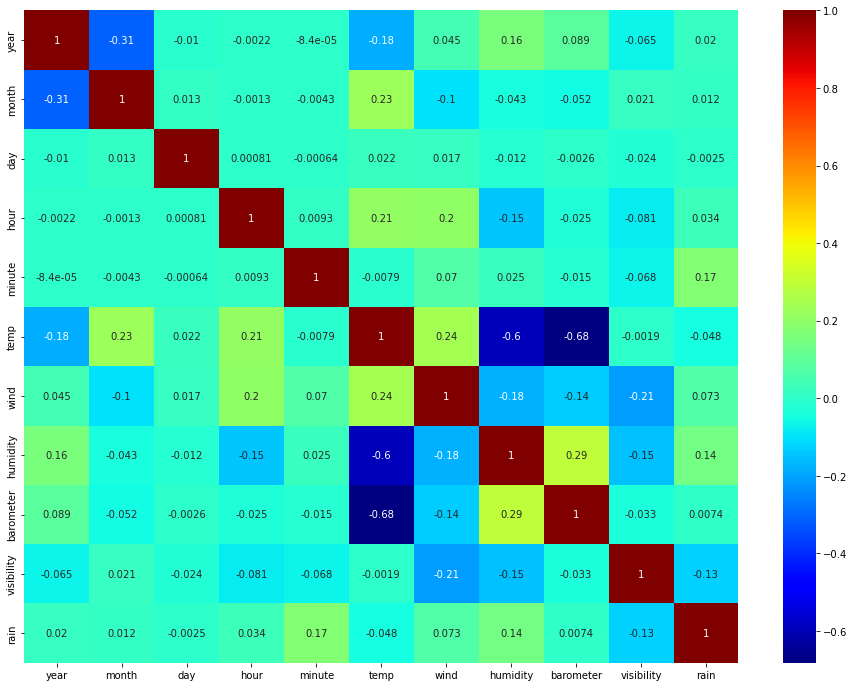

In [50]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation,cmap='jet',annot=True)

### 4 . Modeling

In [51]:
X = data.drop(['rain'], axis=1)

y = data['rain']

In [52]:
c = pd.get_dummies(X['city'], drop_first=True)


In [53]:
X  = pd.concat([c,X], axis=1 )

In [54]:
X.drop('city' , axis =1 , inplace= True)

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Baha              249023 non-null  uint8  
 1   EP                249023 non-null  uint8  
 2   Hail              249023 non-null  uint8  
 3   Jawf              249023 non-null  uint8  
 4   Jazan             249023 non-null  uint8  
 5   Madina            249023 non-null  uint8  
 6   Mecca             249023 non-null  uint8  
 7   Najran            249023 non-null  uint8  
 8   Northern boarder  249023 non-null  uint8  
 9   Qassim            249023 non-null  uint8  
 10  Riyadh            249023 non-null  uint8  
 11  Tabuk             249023 non-null  uint8  
 12  year              249023 non-null  int64  
 13  month             249023 non-null  int64  
 14  day               249023 non-null  int64  
 15  hour              249023 non-null  int64  
 16  minute            24

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [57]:
X_train.shape, X_test.shape

((199218, 22), (49805, 22))

In [58]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['wind'] = max_value(df3, 'wind', 55.0)
    df3['visibility'] = max_value(df3, 'visibility', 49.0)
    df3['humidity'] = max_value(df3, 'humidity', 169.0)


In [59]:
X_train.describe()

,Baha,EP,Hail,Jawf,Jazan,Madina,Mecca,Najran,Northern boarder,Qassim,...,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility
count,199218.000000,199218.000000,199218.000000,199218.000000,199218.000000,199218.000000,199218.000000,199218.000000,199218.000000,199218.000000,...,199218.000000,199218.000000,199218.000000,199218.000000,199218.000000,199218.000000,199218.000000,199218.000000,199218.000000,199218.000000
mean,0.079787,0.074004,0.080891,0.081905,0.079049,0.080093,0.081403,0.079682,0.081313,0.079978,...,2017.710538,6.051230,15.688582,12.537477,0.132920,24.726194,12.946486,37.539124,1015.456867,11.051210
std,0.270964,0.261779,0.272669,0.274221,0.269816,0.271438,0.273454,0.270800,0.273316,0.271259,...,0.705932,3.522284,8.786860,6.912573,1.978765,8.885411,8.690394,23.595972,6.965862,7.041721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,0.000000,904.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,17.000000,1011.000000,5.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,32.000000,1016.000000,16.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,55.000000,1021.000000,16.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,55.000000,100.000000,1101.000000,49.000000


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199218 entries, 215107 to 121958
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Baha              199218 non-null  uint8  
 1   EP                199218 non-null  uint8  
 2   Hail              199218 non-null  uint8  
 3   Jawf              199218 non-null  uint8  
 4   Jazan             199218 non-null  uint8  
 5   Madina            199218 non-null  uint8  
 6   Mecca             199218 non-null  uint8  
 7   Najran            199218 non-null  uint8  
 8   Northern boarder  199218 non-null  uint8  
 9   Qassim            199218 non-null  uint8  
 10  Riyadh            199218 non-null  uint8  
 11  Tabuk             199218 non-null  uint8  
 12  year              199218 non-null  int64  
 13  month             199218 non-null  int64  
 14  day               199218 non-null  int64  
 15  hour              199218 non-null  int64  
 16  minute         

In [61]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
lg = LogisticRegression(solver= 'liblinear', C=1000)


# fit the model
lg.fit(X_train, y_train)


LogisticRegression(C=1000, solver='liblinear')

In [62]:
lg.predict(X_train)

array([False, False, False, ..., False, False, False])

In [63]:
y_pred_test = lg.predict(X_test)

In [64]:
lg.score(X_train, y_train)

0.9863516348924294

In [65]:
lg.score(X_test, y_test)

0.9866680052203594

In [66]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9867


In [68]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(lg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, y_test)))


Training set score: 0.9864
Test set score: 0.9867


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99     49149
        True       0.44      0.04      0.08       656

    accuracy                           0.99     49805
   macro avg       0.71      0.52      0.54     49805
weighted avg       0.98      0.99      0.98     49805

